# ¿Es un lujo la vida saludable en Cuba?


In [11]:
import importlib 
import json
import src.gráficos as gr
import src.funciones as fn

mipyme = fn.cargar_json("data/mipymes.json")
nutrientes = fn.cargar_json("data/valor_nutricional.json")
evolución_precios = fn.cargar_json("data/evolución_precios.json")
frutas_verduas = fn.cargar_json("data/frutas_verduras.json")


productos = ['muslo de pollo', 'pechuga de pollo', 'higado de pollo', 'picadillo de pollo', 'huevo', 'molleja de pollo', 'lomo de cerdo', 'atún', 'pierna de cerdo', 'garbanzos', 'frijoles negros', 'frijoles colorados', 'arroz', 'codito', 'espaguetis', 'leche en polvo', 'azúcar blanca']

#0btener listas con el valor nutricional de los alimentos 
proteina = []
grasas = []
carbohidratos = []

#Este for busca en el diccionario los productos que tienen proteina, grasas y carbohidratos y los añade a su lista correspondiente
for producto in nutrientes:
    proteina.append(nutrientes[producto]["proteina"])
    grasas.append(nutrientes[producto]["grasas"])       
    carbohidratos.append(nutrientes[producto]["carbohidratos"])





La Organización Mundial de la Salud señala que una [alimentación saludable](https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet) nos protege de la malnutrición y de enfermedades graves como la diabetes, los problemas del corazón, los derrames cerebrales y el cáncer.
Estos beneficios vienen de los nutrientes que contienen los alimentos, los cuales se dividen en dos grupos principales:

1) [Macronutrientes](https://www.fundacionparalasalud.org/infantil/202/macronutrientes): sustancias necesarias en grandes cantidades (proteínas, grasas y carbohidratos) que proporcionan energía al organismo para su funcionamiento, reparación, construcción de estructuras y crecimiento. 

2) [Micronutrientes](https://www.paho.org/es/temas/micronutrientes) : vitaminas y minerales requeridos en pequeñas cantidades para la mayoría de las funciones celulares del cuerpo.

Para obtener una alimentación saludable, el cuerpo necesita consumir los nutrientes necesarios a través de una alimentación diversa y consumir como minimo [400g o cinco porciones de frutas y verduras al día](https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet). La cantidad exacta varía según la edad, el sexo, el estilo de vida y la actividad física de cada persona.
Toda esta alimentación se mide a través de las kilocalorías (kcal), que no son más que la forma de medir la energía que los alimentos le dan a nuestro cuerpo para que pueda funcionar, moverse y mantenerse vivo.
Según el documento de la [OMS/FON](https://iris.who.int/server/api/core/bitstreams/f06e1673-3689-4cb1-8a37-762a3e9c5360/content), es necesario respetar las recomendaciones diarias de nutrientes dentro del rango establecido, ya que incluso un pequeño desvío puede afectar la salud. Estas se distribuyen de la siguiente manera:

*Adultos*: Se recomienda consumir entre un 10-15% de proteínas, un 15-30% de grasas y entre un 45-75% de carbohidratos del total de la energía (kcal) diaria. Tambien evitar el consumo de azucar libres de un 10% de los carbohidratos

*Niños y adolescentes*: (2 a 19 años): El rango de las proporciones es casi igual, pero se recomienda entre un 15-35% grasas de la energía total.

*Niños (6 a 24 meses)*: Se introduce la alimentación complementaria de forma gradual, manteniendo la leche materna como base fundamental de su energía.

*Lactantes (0 a 6 meses)*: El 100% de la energía debe provenir exclusivamente de la leche materna. En este periodo no se calculan rangos de nutrientes externos, ya que la leche materna está diseñada biológicamente para cubrir todas las necesidades de energía y nutrientes del bebé.

La distribución de los alimentos durante el día de los adolescentes y adultos deben ser de 5 comidas según el [Ministerio de salud de España](https://estilosdevidasaludable.sanidad.gob.es/alimentacionSaludable/queSabemos/enLaPractica/distribuir/diario/home.htm). Donde el [desayuno](https://www.fundacioncardiologica.org/Alimentacion-saludable-Cuantas-comidas-debemos-comer-al-dia-Hay-alguna-mas-importante-que-otra-348.note.aspx) es la comida más importante en el día ya que han pasado 8 horas sin que el organismo reciba ningún alimento. Por lo que el cerebro no tiene su principal combustible: la glucosa. Se deben incluir lácteos, panes, cereales, quesos o frutas.También se aconseja incorporar meriendas antes del mediodía y por la tarde, basadas en frutas o porciones pequeñas de pan, para evitar llegar con excesiva hambre a la siguiente comida.En el Almuerzo lo ideal es consumir las carnes ya que estas aumentan la concentración y el rendimiento, lo cual permite seguir trabajando productivamente durante la tarde. 
Por lo general la cena suele resultar un problema ya que, muchos saltan algunas de las comidas y por ende llegan a la cena con demasiado hambre y se sobrealimentan. En la cena se deben incluir alimentos que ayuden a descansar mejor, como son los alimentos del grupo almidones (pastas, arroz, papa, legumbres: porotos, lentejas, panes) ya que ellos producen un efecto de calma y relajación.

A continuación muestro una proporción de los macronutrientes adaptadas al contexto en Cuba, puesto que consumir alimentos altos en carbohidratos es mas económico que los alimentos altos proteina y grasas

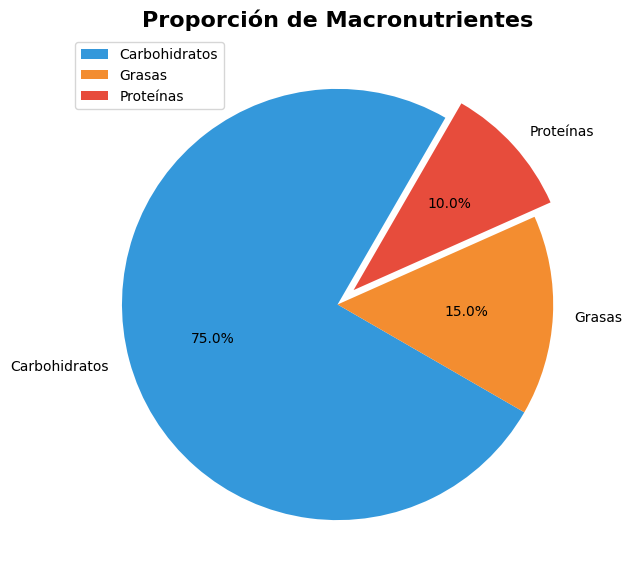

In [12]:
gr.proporción_macronutrientes()

A partir de la proporción mostrada en el gráfico, se puede calcular la cantidad exacta en gramos de cada macronutriente (proteínas, grasas y carbohidratos) que una persona debe consumir.

Esta cantidad en gramos varía directamente con el total de kilocalorías que cada quien necesita al día.Es decir, a más calorías necesarias, mayor será la cantidad de gramos de cada macronutriente que debes ingerir.

Si quieres conocer la cantidad de kcal que debes consumir consulta la [Revista Cubana de Recomendaciones Biomedicas](http://scielo.sld.cu/scielo.php?script=sci_arttext&pid=S0864-03002009000200001). 
Pero usaremos de ejemplo la cantidad de kcal de un hombre entre uno 18-30 años con un estilo de vida activo



In [13]:
resultado = fn.calcular_macronutrientes(2778)
for clave, valor in resultado.items(): # para mostrar los resultados de forma más clara
    print(f"{clave}: {valor} g")

carbohidratos: 521 g
grasas: 46 g
proteinas: 69 g


El presente trabajo analiza la dificultad de acceder a una alimentación saludable en Cuba, donde los ingresos promedio resultan insuficientes para cubrir las necesidades nutricionales básicas. Según datos oficiales, el salario medio de un trabajador estatal es de [6,449 CUP](https://www.onei.gob.cu/sites/default/files/publicaciones/2025-04/salario-medio-en-cifras-2024-edicion-2025.pdf), una cifra que limita significativamente la capacidad de adquirir alimentos diversos y nutritivos.

Un caso ilustrativo es el huevo, [reconocido internacionalmente]((https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.gob.mx/agricultura/articulos/huevo-alimento-fundamental-en-la-dieta-del-mundo%3Fidiom%3Des&ved=2ahUKEwjy2pKHs52SAxVKQzABHbjDMN8QFnoECCgQAw&usg=AOvVaw2S7MGGkdb03_PZzj5P5G8Q)) como un alimento esencial en una dieta equilibrada por su valor nutricional. Sin embargo, su precio en Cuba representa una barrera económica considerable para gran parte de la población.

En el gráfico adjunto se evidencia la inestabilidad y el incremento sostenido del precio del huevo entre enero de 2024 y noviembre de 2025. Aunque el precio del huevo sube y baja, siempre sigue siendo muy caro para el bolsillo de un cubano. Incluso en sus momentos más bajos, comprar un carton huevo significa gastar tanto dinero que difícilmente queda para otros alimentos necesarios. Esto impide que las personas puedan acceder a todos los nutrientes que necesitan para una alimentación completa.




Precio mínimo: 2250 CUP en la fecha: 2025-04 y representa el 34.89% del salario promedio de un cubano

Precio máximo: 3300 CUP en la fecha: 2025-01 y representa el 51.17% del salario promedio de un cubano


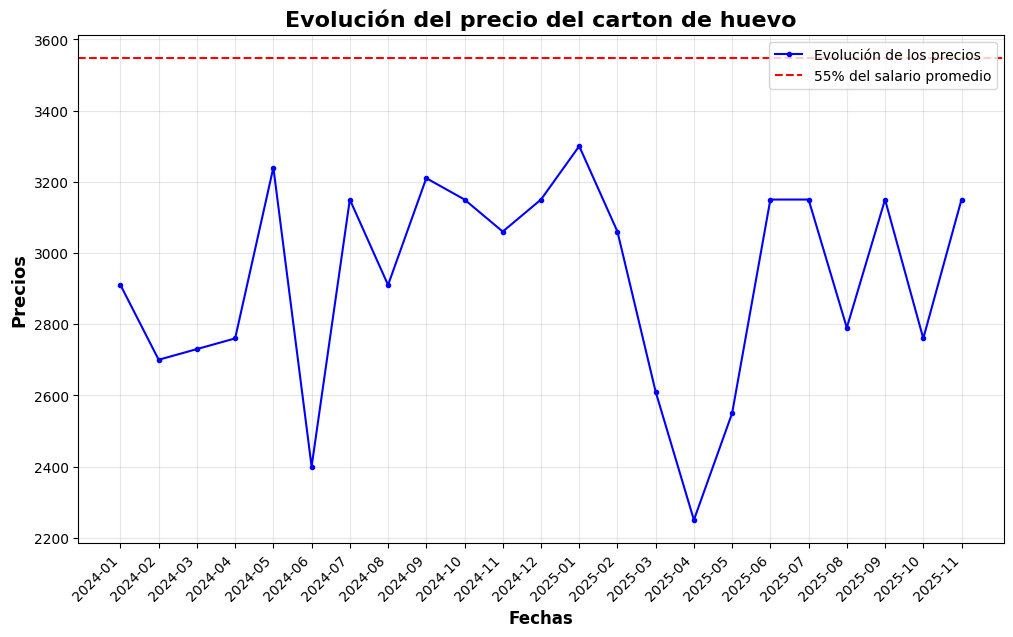

In [24]:
fechas, promedio_precio = fn.datos_evolución_precios(evolución_precios, "huevo") 

#Obtener el indice del rango de las 2 fechas para visualizar
#Crear una lista con esos valores usando compresion de listas, pero usando el for por los indices 
#Crear otra lista con los valores del mismo indice que las fechas para los precios

def periodo(inicial, final):
    for i, x in enumerate(fechas):
        if x== inicial:
            inidi_inicial = i

        if x== final:
            inidi_final = i

    return inidi_inicial, inidi_final



inicial, final = periodo("2024-03","2025-03")

per = []
for i, x in enumerate(fechas):
    
    p = [i for i in range(inicial, final+1)]       
    
    if i in p:
        per.append(x)

precio = []

for i, x in enumerate(promedio_precio):
    
    p = [i for i in range(inicial, final+1)]
    
    if i in p:
        precio.append(x)


#Este código es para buscar el mínimo precio en la lista del promedio. Luego utilizo ".index" para buscar en la lista de las fechas la misma posición del producto para imprimir el precio asociada a la fecha
print(f"Precio mínimo: {min(promedio_precio)} CUP en la fecha: {fechas[promedio_precio.index(min(promedio_precio))]} y representa el {(((min(promedio_precio)/6449)) * 100):.2f}% del salario promedio de un cubano")
print()
print(f"Precio máximo: {max(promedio_precio)} CUP en la fecha: {fechas[promedio_precio.index(max(promedio_precio))]} y representa el {(((max(promedio_precio)/6449)) * 100):.2f}% del salario promedio de un cubano")

gr.evolución_precios(promedio_precio,fechas)

También, la leche de vaca es un [alimento básico y necesario para una alimentacion saludable](https://scielo.isciii.es/pdf/nh/v31n1/09revision09.pdf). Para nuestro análisis, calculamos cuánto cuesta realmente preparar un vaso de leche de 8 onzas (240 ml) en Cuba, basándonos en los precios de la leche en polvo y la azucar de las MIPYMES.

Según los estándares de preparación (sin considerar dietas infantiles), necesitamos:

- 40 gramos de leche en polvo (equivalente a dos cucharadas ligeramente colmadas)

- 15 gramos de azúcar (aproximadamente una cucharada)

Al sumar el costo de estos dos ingredientes, podemos determinar cuánto debe gastar un cubano para consumir este alimento esencial, lo que nos permite evaluar su impacto en el presupuesto familiar.

In [15]:
precio_vaso, cantidad_vaso, valor_nutri =fn.leche_polvo(796,338)

print(f"Valor de un vaso de leche de 8oz: {round(precio_vaso)}cup\n\nCantidad de vasos de leche que puedes hacer con una bolsa de 1kg:{cantidad_vaso}\n\nValor nutricional de 1 vaso de leche: {valor_nutri}")
print()
print(f"Tomar 1 vaso de leche en un mes representa el {((round(precio_vaso))/6449) * 100:.2f}% del salario mensual")

Valor de un vaso de leche de 8oz: 81cup

Cantidad de vasos de leche que puedes hacer con una bolsa de 1kg:25.0

Valor nutricional de 1 vaso de leche: {'Proteina': 10, 'Carbohidrato': 30, 'Grasas': 10}

Tomar 1 vaso de leche en un mes representa el 1.26% del salario mensual


En el mercado actual, las carnes comercializadas por las MIPYMES representan los alimentos de mayor costo y, por tanto, los más difíciles de adquirir. Aunque organismos de salud recomiendan que las proteínas constituyan una parte esencial de la dieta diaria, la realidad económica en Cuba impide que muchas familias puedan acceder incluso al minimo de las prporcion recomendada. Con el fin de identificar las opciones menos costosas dentro de este grupo, la siguiente gráfica compara el precio promedio por libra de las distintas carnes, permitiendo visualizar cuál es la alternativa más económica para el bolsillo del trabajador




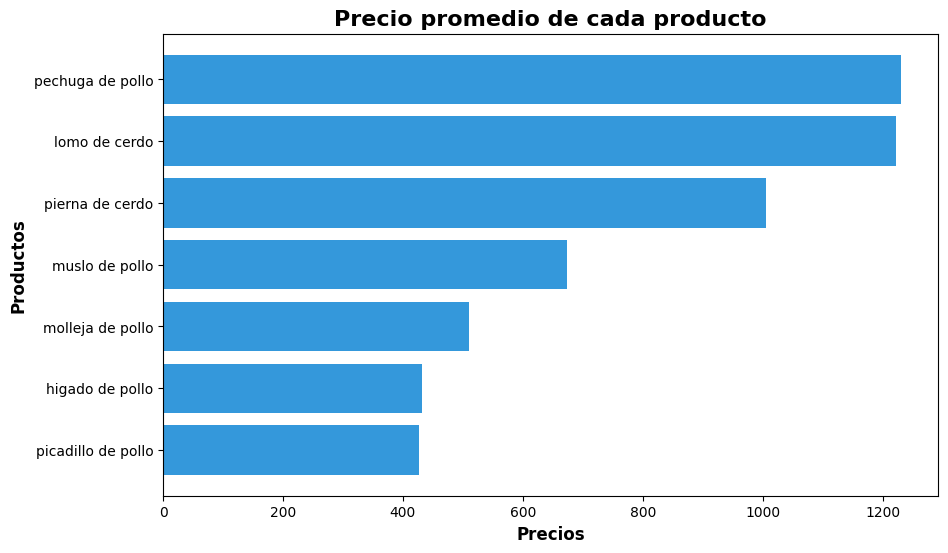

In [16]:
precio = fn.precio_promedio_lb(productos,mipyme)
#print(precio)

#Este código es para ordenar un dicionario por el valor de su llave correspondiente
claves_ordenadas = sorted(precio, key=precio.get)  #La función sorted ordena los valores que estan entre parentesis, Key=precio.get le indica como debe ordenar
no_comparar = ["huevo", "azúcar blanca", "atún", "leche en polvo", "arroz", "codito", "espaguetis", "frijoles negros", "frijoles colorados", "garbanzos"] #Lista de productos que no son específicos por libra
valores_ordenados = []                                                 #precio.get es otra forma de acceder a los valores de un diccionario. Se escribe "Key" para ordenar las llaves del diccionario por los valores correspondientes
producto_especificos = [i for i in claves_ordenadas if i not in no_comparar] #Esta línea crea una lista con las claves ordenadas, pero excluye los productos que no son específicos por libra

for clave in producto_especificos:
    valores_ordenados.append(round(precio[clave])) #Este for itera sobre las claves ordenadas, añade a la lista los valores del diccionario en el mismo orden de las claves ordenadas


gr.barra_costo_promedio(producto_especificos,valores_ordenados)

Más allá de verificar los productos más baratos, resulta fundamental analizar cuánto debe invertir realmente un cubano para obtener cada gramo de los nutrientes que su cuerpo necesita. El siguiente gráfico de barras apiladas revela esta relación de eficiencia, donde los segmentos de color permiten identificar qué tan caro resulta adquirir proteínas, carbohidratos o grasas de forma individual dentro de cada producto.

Al observar estos datos, es evidente que los frijoles negros se consolidan como la fuente de proteína más económica para la población cubana, mientras que en la categoría de carbohidrato, los espaguetis logran superar incluso al arroz en términos de costo por gramo de carbohidrato. Por otro lado, la pierna de cerdo aparece como la opción más accesible para cubrir los requerimientos de grasas. No obstante la leche en polvo es el mas eficiente para obtener todos los macronutrientes necesario. Este fenómeno ocurre porque dichos productos no solo tienen un precio competitivo en las Mipymes, sino que poseen una alta densidad nutricional, lo que permite al consumidor obtener una mayor cantidad de nutrientes por cada peso invertido.

Alimento más económico para obtener proteina:>> frijoles negros
Alimento más económico para obtener grasa:>> pierna de cerdo
Alimento más económico para obtener carbohidratos:>> espaguetis
Alimento mas económico para obtener todos los macronutrientes:>> leche en polvo


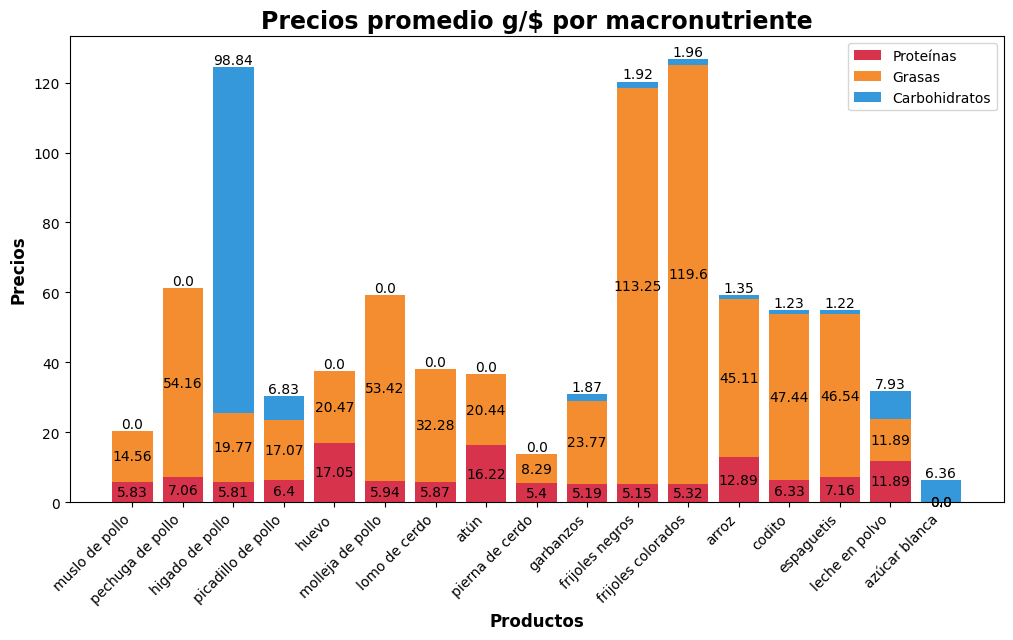

In [17]:
import matplotlib.pyplot as plt

protein = fn.costo_promedio_nutr(mipyme, productos,proteina)
gras = fn.costo_promedio_nutr(mipyme, productos, grasas)
car = fn.costo_promedio_nutr(mipyme, productos,carbohidratos)



p = list(protein.values())
g = list(gras.values())
c = list(car.values())


p_positivos = [valor for valor in p if valor > 0]#algunos alimentos tiene 0 proteina, grasas o carbohidrato, así que esta lista solo toma los valores mayor que cero para evitar errores al buscar el mínimo
g_positivos = [valor for valor in g if valor > 0]
c_positivos = [valor for valor in c if valor > 0]
print(f"Alimento más económico para obtener proteina:>> {productos[p.index(min(p_positivos))]}")
print(f"Alimento más económico para obtener grasa:>> {productos[g.index(min(g_positivos))]}")
print(f"Alimento más económico para obtener carbohidratos:>> {productos[c.index(min(c_positivos))]}")
print(f"Alimento mas económico para obtener todos los macronutrientes:>> leche en polvo")

gr.barra_apilada(productos,c,p,g)

 

Ademas de consumir los macronutrientes necesarios, una dieta saludable tambien debe incluir frutas y verduras. La OMS recomineda consumir como minimo [400g o cinco porciones de frutas y verduras al día](https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet). Esta cantidad la podemos distribuir en el dia donde consumimos 3 porciones de frutas y 2 porcione de verduras. Para conocer el costo de las porciones de las frutas debemos tener en cuenta que 1 libra de guayaba, fruta bomba y platano fruta tiene porciones diferentes. Por tanto el analisis seria la compra de 1 libra de frutas para consumir en 1 dia e ir intercalando los dias con las frutas disponibles. La cantidad para comprar de cada una de las frutas serian de 10 libras

In [18]:
p,f,g,m = fn.frutas()

print(f"Costo mensual del consumo de platano: {p} cup")
print(f"Costo mensual del consumo de fruta bomba: {f} cup")
print(f"Costo mensual del consumo de guayaba: {g} cup")
print()
print(f"Costo mensual total de las frutas: {m} cup")

Costo mensual del consumo de platano: 1290 cup
Costo mensual del consumo de fruta bomba: 1500 cup
Costo mensual del consumo de guayaba: 2000 cup

Costo mensual total de las frutas: 4790 cup


En el caso de las verduras una cantidad racionable para consumir en una comida son 100 gramos de pepino, tomate, remolacha o zanahoria. Si en el amuerzo y la comida se consume un tipo de verduras diferentes durante 30 dias, el costo seria el siguiente

In [23]:
r_100, p_100, gramoT, gramoZ = fn.verduras()

print(f"Costo de consumir 100g de remolacha: {round(r_100)} cup")
print(f"Costo de consumir 100g de pepino: {round(p_100)} cup")
print(f"Costo de consumir 100g tomate: {round(gramoT)} cup")
print(f"Costo de consumir 100g de zanahoria: {round(gramoZ)} cup")
print()
print(f"Costo mensual del consumo de verduas: {round((r_100+p_100+gramoZ+gramoT))*15} cup")
      

Costo de consumir 100g de remolacha: 110 cup
Costo de consumir 100g de pepino: 110 cup
Costo de consumir 100g tomate: 132 cup
Costo de consumir 100g de zanahoria: 110 cup

Costo mensual del consumo de verduas: 6945 cup


Comprar estas cantidades de frutas y verduras resulta imposible con el salario promedio en Cuba. La situación alcanza niveles críticos al observar que las verduras por sí solas representan el 107.69% del salario, superando completamente el ingreso mensual. Este gráfico muestra claramente que los precios de estos alimentos básicos superan lo que una persona puede pagar con su salario

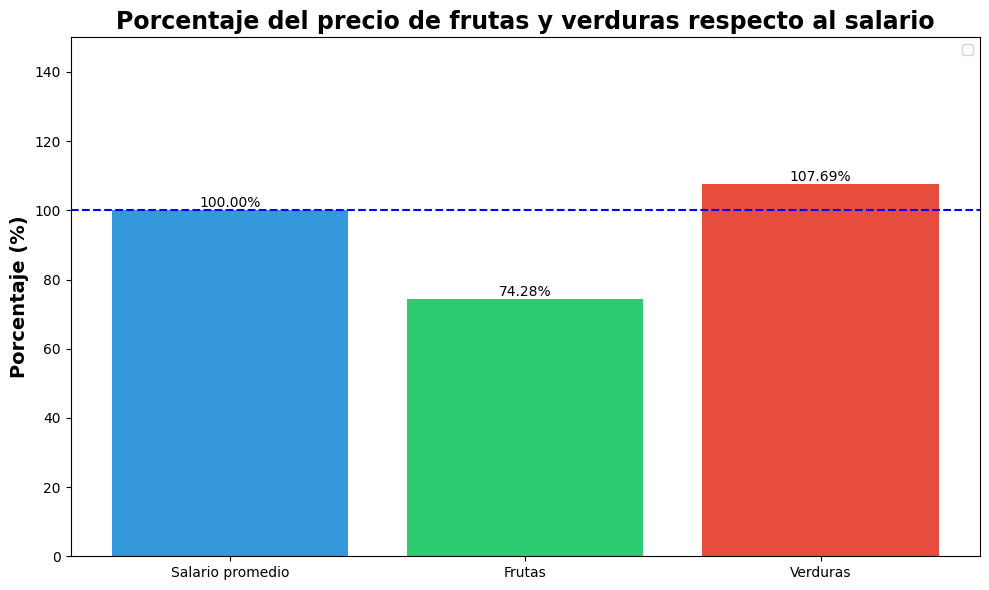

In [20]:
gr.comparación(4790,6945)